### Convolutional Neural Network  (흑백 이미지).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings     
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1. 데이터 불러오기:

In [2]:
# 데이터 가져오기.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]
n_test_size = X_test.shape[0]

In [3]:
# Shape 확인.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


#### 2. 데이터 시각화:

Y 레이블 : 2


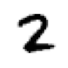

Y 레이블 : 0


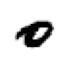

Y 레이블 : 6


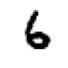

Y 레이블 : 5


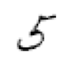

Y 레이블 : 2


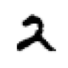

In [4]:
# 이미지 데이터 시각화 (5개).
for i_image in [ random.randint(0,n_train_size-1) for _ in range(5)]:
    print("Y 레이블 :", y_train[i_image])
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[i_image,:,:],cmap="Greys")
    plt.axis("off")
    plt.show()

#### 3. 데이터 준비:

In [5]:
# Scaling.
X_train = X_train/255                   
X_test = X_test/255                        

In [6]:
# 4 차원 배열로 reshaping 해준다.
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [7]:
# One-hot-encoding.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 4. CNN 모델 정의:

In [8]:
drop_prob = 0.5
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(5,5),padding='same',activation="relu", name="Conv-1"))        # 1 channel of grayscale.
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-1"))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu",name="Conv-2"))
my_model.add(MaxPooling2D(pool_size=2, name="Pooling-2"))
# Flattened fully connected layer.
my_model.add(Flatten(name="Flatten"))
my_model.add(Dense(units = 1024, activation="relu", name="Dense-1"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob, name="Dropout"))
# Output layer.
my_model.add(Dense(units = 10, activation="softmax", name="Dense-2"))

In [9]:
# 모델의 summary (내부 구조) 출력.
# Conv-1의 파라미터 수 = n_filters1 * n_kernel_elements1 + n_filters1 = 32 * (5*5) + 32 = 832.
# Conv-2의 파라미터 수 = n_filters1 * n_filters2 * n_kernel_elements2 + n_filters2 = 32 * 64 * (5*5) + 64 = 51264.
# Dense-1의 파라미터 수 = 이전층의 출력 * n_nodes + n_nodes = 3136 * 1024 + 1024 = 3212288.
# Dense-2의 파라미터 수 = 이전층의 출력 * n_output + n_output = 1024 * 10 + 10 = 10250.
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
Pooling-1 (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
Conv-2 (Conv2D)              (None, 14, 14, 64)        51264     
_________________________________________________________________
Pooling-2 (MaxPooling2D)     (None, 7, 7, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Dense-1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
Dropout (Dropout)            (None, 1024)              0

#### 5. Hyperparameter 와 Optimizer 정의:

In [10]:
# Hyperparameters.
n_epochs = 20
batch_size = 128
learn_rate = 0.001

In [11]:
# Optimizer 객체 생성 후 컴파일한다.
my_optimizer=Adam(lr=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 6. 학습 & History 시각화:

In [12]:
# 학습.
# verbose = 0 : 출력 없음. verbose = 1 : 출력 함.
my_EarlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)          # 조기 종료 허락!
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1,callbacks=[my_EarlyStop])

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1766 - accuracy: 0.9447 - val_loss: 0.0523 - val_accuracy: 0.9834
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0294 - val_accuracy: 0.9919
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0328 - val_accuracy: 0.9903
Epoch 

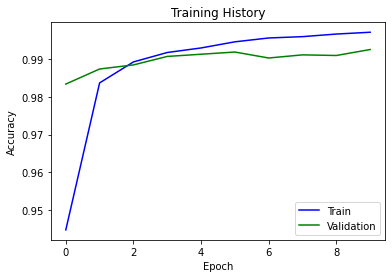

In [13]:
# 학습 history 출력. 
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 7. 테스팅:

정답 : 3
예측 : 3


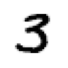

정답 : 6
예측 : 6


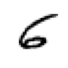

정답 : 0
예측 : 0


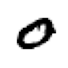

정답 : 1
예측 : 1


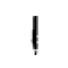

정답 : 8
예측 : 8


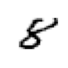

In [14]:
# 랜덤으로 테스트 이미지를 추출해서 예측해 본다.
for i_image in [ random.randint(0,n_test_size-1) for _ in range(5)]:
    print("정답 :" , np.argmax(y_test[i_image]))
    print("예측 :" , np.argmax(my_model.predict(X_test[i_image].reshape(1,28,28,1))))     # 4 차원 배열로 reshaping 해준다!!!
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i_image,:,:,0],cmap="Greys")
    plt.axis("off")
    plt.show()

In [15]:
# 최종적으로 정확도 계산.
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.992
